In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [47]:
data = pd.read_csv('Data/N3C_data_10000_sample.csv')
data. head()

,Unnamed: 0,conditions,age,severity_covid_death,outcome,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,...,vilazodone,vortioxetine,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline
0,1,"[78473, 137548, 4236484, 37311338, 37311341]",41.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"[195867, 197684, 201078, 4031128, 4289526, 370...",62.0,0,1,970,38003563.0,8532.0,8527.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"[133834, 140214, 438134, 438398, 442588, 44413...",26.0,0,1,463,0.0,8507.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"[25297, 254761]",38.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"[77670, 134222, 137989, 140273, 194133, 254761...",43.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Drop the columns that are not needed
# data = data.drop(columns=['Unnamed: 0','conditions'])
data = data.drop(columns=['Unnamed: 0'])
data.head()

,conditions,age,severity_covid_death,outcome,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,...,vilazodone,vortioxetine,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline
0,"[78473, 137548, 4236484, 37311338, 37311341]",41.0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[195867, 197684, 201078, 4031128, 4289526, 370...",62.0,0,1,970,38003563.0,8532.0,8527.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[133834, 140214, 438134, 438398, 442588, 44413...",26.0,0,1,463,0.0,8507.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[25297, 254761]",38.0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[77670, 134222, 137989, 140273, 194133, 254761...",43.0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Attempting a more robust and simplified method to handle the conditions data
import ast

# Safely convert string representation of list to actual list and count length
def safe_eval_list_count(conditions_str):
    try:
        # Convert string to list safely
        conditions_list = ast.literal_eval(conditions_str)
        return len(conditions_list)
    except:
        return 0

# Apply the safer function to the 'conditions' column
data['conditions_count'] = data['conditions'].apply(safe_eval_list_count)

# Drop the original 'conditions' column
data = data.drop(columns=['conditions'])

# Display the first few rows to verify the changes
data.head()


,age,severity_covid_death,outcome,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,fluoxetine,...,vortioxetine,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline,conditions_count
0,41.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,62.0,0,1,970,38003563.0,8532.0,8527.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,26.0,0,1,463,0.0,8507.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,38.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,43.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17


In [50]:
# Display summary statistics for selected medication columns
medication_columns = ['trazodone', 'fluoxetine', 'sertraline']
data[medication_columns].describe()

,trazodone,fluoxetine,sertraline
count,10000.000000,10000.000000,10000.000000
mean,0.027600,0.014600,0.027400
std,0.163832,0.119951,0.163254
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


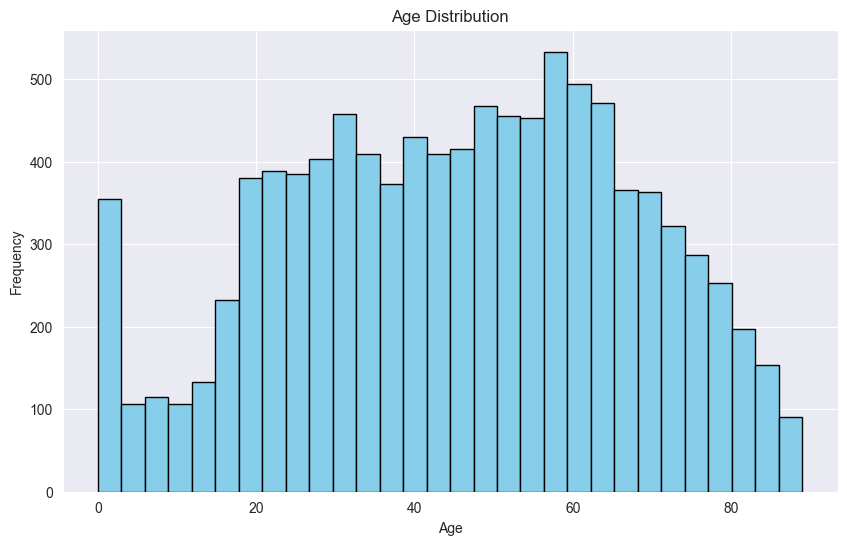

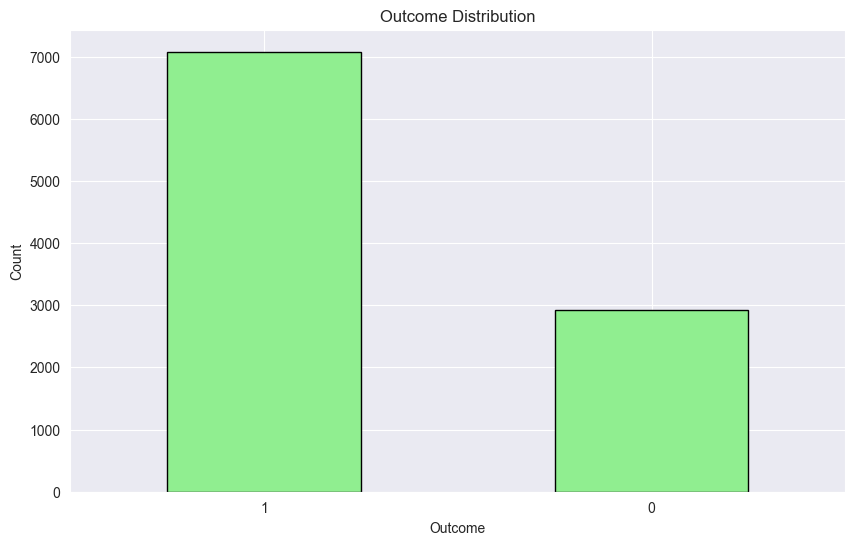

In [51]:
import matplotlib.pyplot as plt

# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Plotting the outcome distribution
plt.figure(figsize=(10, 6))
data['outcome'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)

# Show plots
plt.show()


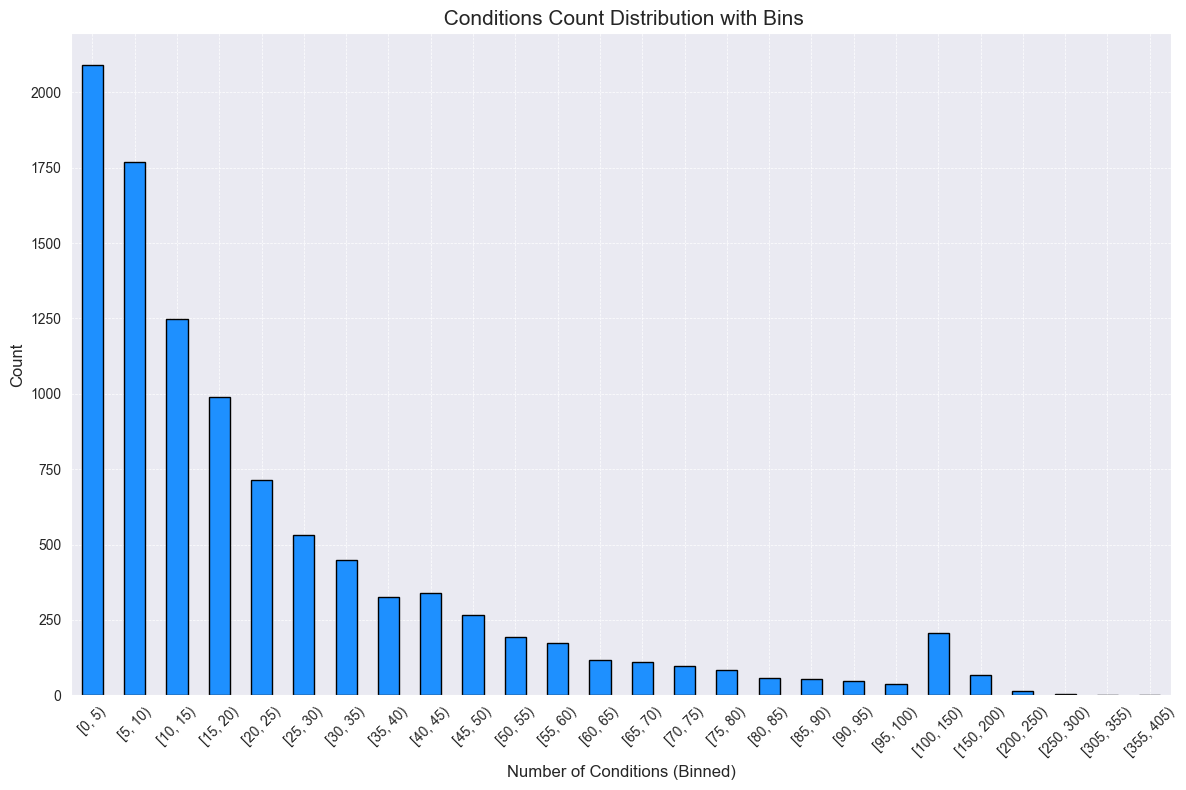

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

conditions = data['conditions_count']
# # Group data into bins to reduce the number of bars
# bins = np.arange(0, conditions.max(skipna=True)+5, 5)  # Adjust bin width as necessary
# data_binned = pd.cut(conditions, bins=bins, include_lowest=True, right=False).value_counts().sort_index()

bins_less_than_100 = np.arange(0, 100 + 5, 5)
bins_100_to_300 = np.arange(100, 300 + 50, 50)

# Add an additional bin for 300 to avoid overlap
bins_300_and_above = np.arange(305, conditions.max() + 50, 50)

# Calculate histograms for each bin range
hist_less_than_100 = pd.cut(conditions, bins=bins_less_than_100, include_lowest=True, right=False).value_counts().sort_index()
hist_100_to_300 = pd.cut(conditions, bins=bins_100_to_300, include_lowest=True, right=False).value_counts().sort_index()
hist_300_and_above = pd.cut(conditions, bins=bins_300_and_above, include_lowest=True, right=False).value_counts().sort_index()

# Concatenate histograms for 100-300 bin with the rest
combined_histogram = pd.concat([hist_less_than_100, hist_100_to_300, hist_300_and_above])

# Plotting the conditions count distribution with bins
plt.figure(figsize=(12, 8))
combined_histogram.plot(kind='bar', color='dodgerblue', edgecolor='black')

# Enhancements for clarity
plt.title(' Conditions Count Distribution with Bins', fontsize=15)
plt.xlabel('Number of Conditions (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Further rotation for better readability
#plt.yscale('log')  # Using logarithmic scale to focus on the distribution
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plots
plt.tight_layout()
plt.show()


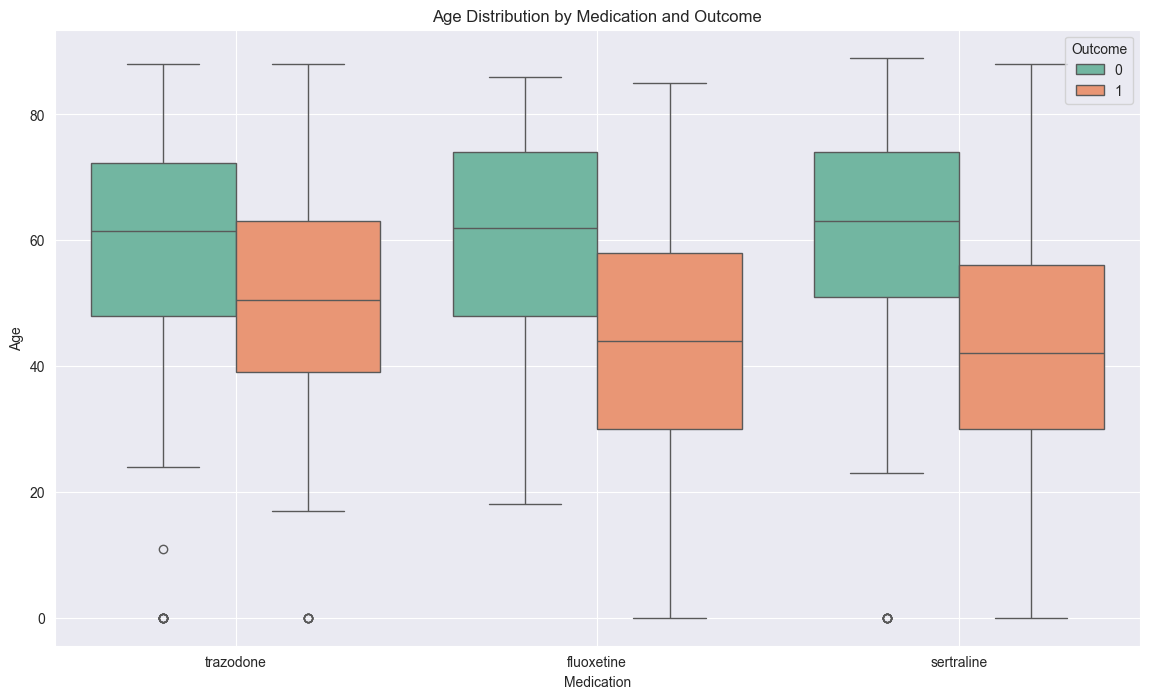

In [53]:
import seaborn as sns

# Selecting a subset of the data with relevant columns
medications_outcome_age = data[['age', 'outcome', 'trazodone', 'fluoxetine', 'sertraline']]

# Melting the dataframe for easier plotting
medications_melted = medications_outcome_age.melt(id_vars=['age', 'outcome'], var_name='Medication', value_name='Taken')

# Filtering only cases where medications are taken
medications_taken = medications_melted[medications_melted['Taken'] == 1]

# Creating boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(x='Medication', y='age', hue='outcome', data=medications_taken, palette='Set2')
plt.title('Age Distribution by Medication and Outcome')
plt.xlabel('Medication')
plt.ylabel('Age')
plt.legend(title='Outcome', loc='upper right')
plt.grid(True)
plt.show()


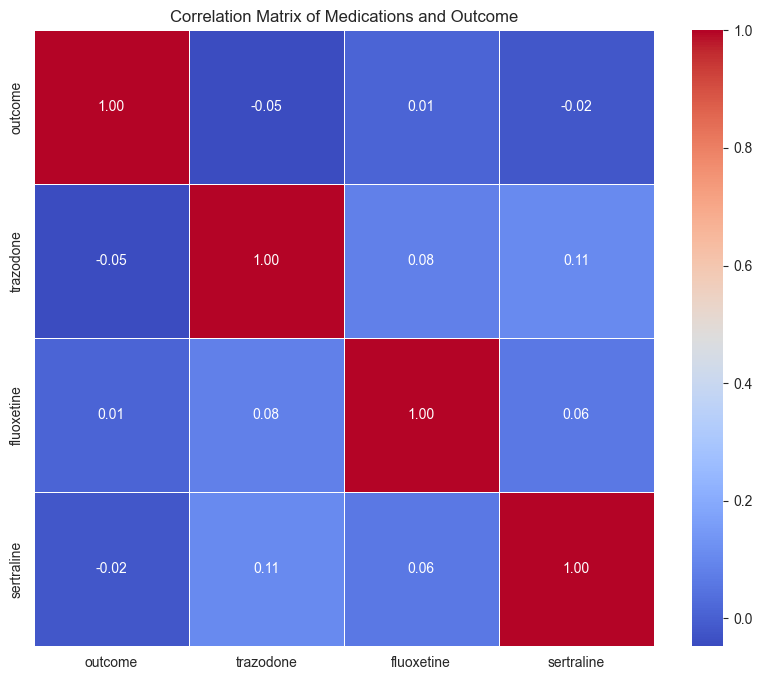

In [55]:
import numpy as np

# Selecting relevant columns for correlation analysis
correlation_data = data[['outcome', 'trazodone', 'fluoxetine', 'sertraline']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Medications and Outcome')
plt.show()


<Axes: >

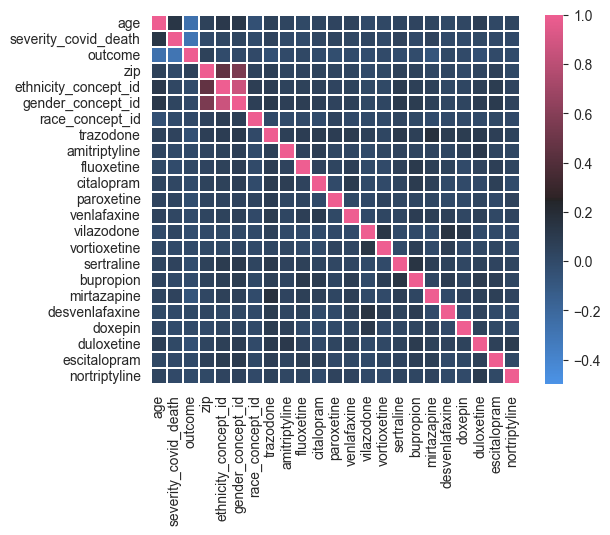

In [56]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

<Axes: xlabel='severity_covid_death', ylabel='Count'>

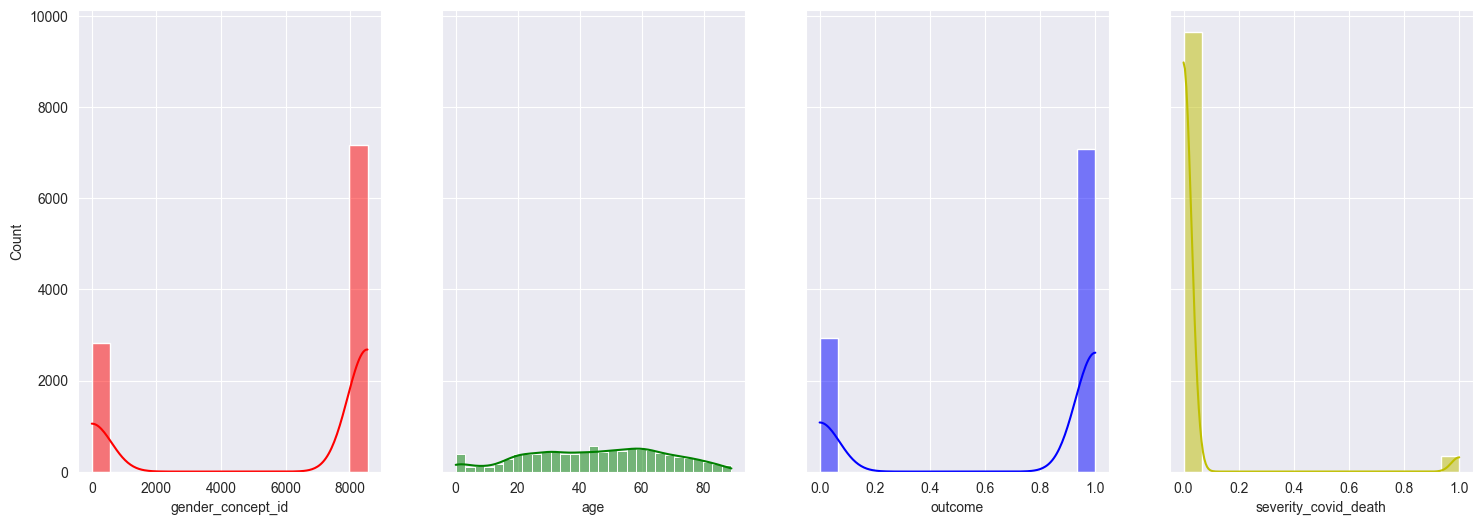

In [58]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="gender_concept_id", kde=True, color='r')
sns.histplot(data, ax=axes[1], x='age', kde=True, color='g')
sns.histplot(data, ax=axes[2], x='outcome', kde=True, color='b')
sns.histplot(data, ax=axes[3], x='severity_covid_death', kde=True, color='y')

In [59]:
import pandas as pd

# Define the number of bins and the method for binning
num_bins = 5  # You can adjust this as needed
bin_method = 'equal_width'  # Options: 'equal_width', 'equal_freq'

# Define the binning function
def bin_continuous_values(values, num_bins, method='equal_width'):
    if method == 'equal_width':
        bins = pd.cut(values, num_bins, labels=False)
    elif method == 'equal_freq':
        bins = pd.qcut(values, num_bins, labels=False)
    else:
        raise ValueError("Invalid binning method. Choose 'equal_width' or 'equal_freq'.")
    return bins

# Apply binning to the continuous column
data['age'] = bin_continuous_values(data['age'], num_bins, bin_method)

# 'discrete_column' will now contain discrete values based on the binning
data['zip'] = bin_continuous_values(data['zip'], num_bins, bin_method)
data['race_concept_id'] = bin_continuous_values(data['race_concept_id'], num_bins, bin_method)
data['gender_concept_id'] = bin_continuous_values(data['gender_concept_id'], num_bins, bin_method)
data['ethnicity_concept_id'] = bin_continuous_values(data['ethnicity_concept_id'], num_bins, bin_method)
data['conditions_count'] = bin_continuous_values(data['conditions_count'], num_bins, bin_method)


data.head()

,age,severity_covid_death,outcome,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,fluoxetine,...,vortioxetine,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline,conditions_count
0,2,0,1,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3,0,1,4,4,4,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,0,1,2,0,4,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2,0,1,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2,0,1,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<Axes: >

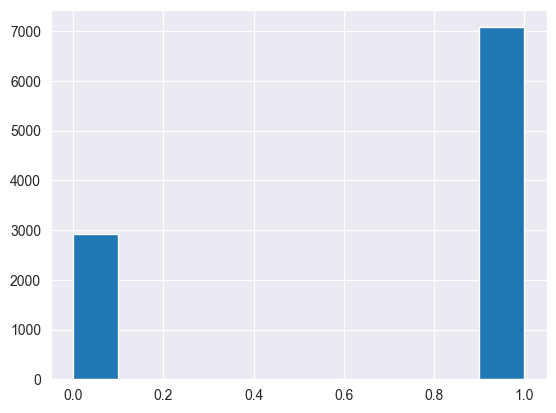

In [60]:
data['outcome'].hist()

In [61]:
from sklearn.model_selection import train_test_split
# split the data into features and target variable
X = data.drop(columns=['outcome','zip'])
y = data['outcome']

# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.89371934, -0.19009265,  0.73037548, ..., -0.16338312,
        -0.07351222, -0.22689853],
       [ 0.7719195 , -0.19009265,  0.73037548, ...,  6.12058318,
        -0.07351222,  3.17233044],
       [-0.89371934, -0.19009265,  0.73037548, ..., -0.16338312,
        -0.07351222, -0.22689853],
       ...,
       [-0.89371934, -0.19009265, -1.36915878, ..., -0.16338312,
        -0.07351222, -0.22689853],
       [-0.89371934, -0.19009265,  0.73037548, ..., -0.16338312,
        -0.07351222, -0.22689853],
       [ 1.60473892, -0.19009265,  0.73037548, ..., -0.16338312,
        -0.07351222, -0.22689853]])

In [63]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features, 1))
        self.bias = 0
    
    def cost_function(self, h, y):
        m = y.shape[0]
        cost = -1 / m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def fit(self, X, y):
        m, n = X.shape
        self.initialize_parameters(n)
        
        for i in range(self.num_iterations):
            # Forward propagation
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            
            # Compute cost
            cost = self.cost_function(h, y)
            
            # Backpropagation
            dw = 1 / m * np.dot(X.T, (h - y))
            db = 1 / m * np.sum(h - y)
            
            # Gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if i % 100 == 0:
                print(f'Cost after iteration {i}: {cost}')
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        predictions = (h >= 0.5).astype(int)
        return predictions


In [64]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_train.shape

(8000, 1)

In [65]:
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are your training and testing data
# Initialize and train the logistic regression model

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.6268729807722503
Cost after iteration 200: 0.588532370429192
Cost after iteration 300: 0.565202899533342
Cost after iteration 400: 0.5503905415452337
Cost after iteration 500: 0.540652399044558
Cost after iteration 600: 0.5340612183694983
Cost after iteration 700: 0.5294876208743995
Cost after iteration 800: 0.5262441305033743
Cost after iteration 900: 0.5238986978206895


In [66]:

# Calculate train accuracy
train_predictions = model.predict(X_train)
train_accuracy = np.mean(train_predictions == y_train) * 100
print("Train Accuracy:", train_accuracy)

# # Assume you have X_test and y_test from your dataset
# X_test = np.array([[2, 2], [6, 7]])
# y_test = np.array([[0], [1]])

# Calculate test accuracy
test_predictions = model.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test) * 100
print("Test Accuracy:", test_accuracy)


Train Accuracy: 75.425
Test Accuracy: 74.15


In [67]:
# Precision, Recall, and F1 Score without using sklearn

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Calculate precision, recall, and F1 score
lr_pre = precision(y_test, test_predictions)
lr_rec = recall(y_test, test_predictions)
lr_f1 = f1_score(y_test, test_predictions)
lr_acc = accuracy(y_test, test_predictions)

print("Precision:", lr_pre)
print("Recall:", lr_rec)
print("F1 Score:", lr_f1)
print("Accuracy:", lr_acc)


Precision: 0.7399678972712681
Recall: 0.978076379066478
F1 Score: 0.8425220834602498
Accuracy: 0.7415


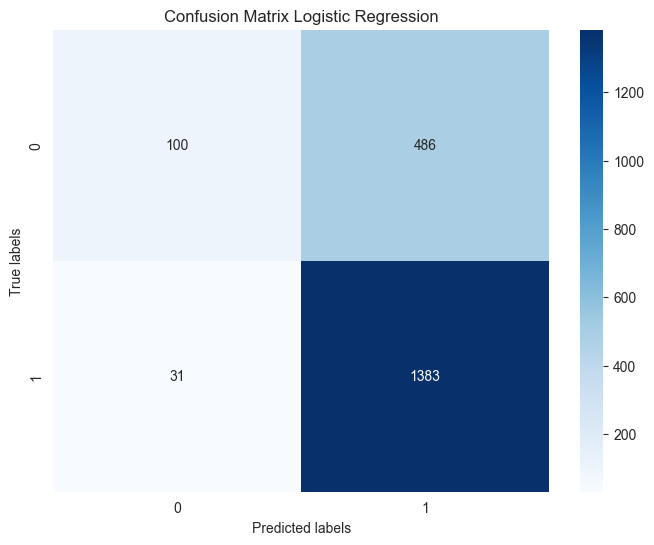

In [68]:
# confusion matrix graph
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

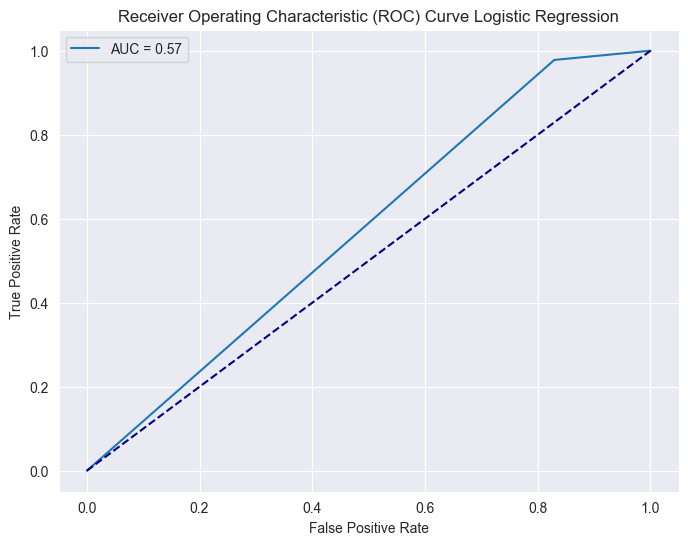

In [69]:
# ROC Graph

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities for each class
probs = model.predict(X_test)
probs = probs.flatten()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
plt.legend()
plt.show()


In [70]:
import numpy as np
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [71]:
data = data.reindex(columns=[col for col in data.columns if col != 'outcome'] + ['outcome'])
data.head()

,age,severity_covid_death,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,fluoxetine,citalopram,...,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline,conditions_count,outcome
0,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,3,0,4,4,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1,0,2,0,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [72]:
# from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
# X_test = test.drop(columns=['outcome'])
# Y = test['outcome']
# y_train = train['outcome']
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="outcome")
# Y_pred = naive_bayes_gaussian(X_train, X=X_test,y_train)

# from sklearn.metrics import confusion_matrix, f1_score
# print(confusion_matrix(Y_test, Y_pred))
#print(f1_score(Y_test, Y_pred, average='weighted'))
# print(accuracy_score(Y_test, Y_pred))

# predict the outcome on single data sample
# single_data = X_test[0]
# single_data


C:\Users\devas\AppData\Local\Temp\ipykernel_18152\2777305612.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
C:\Users\devas\AppData\Local\Temp\ipykernel_18152\2777305612.py:13: RuntimeWarning: invalid value encountered in scalar divide
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
C:\Users\devas\AppData\Local\Temp\ipykernel_18152\2777305612.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))


In [73]:
# accuracy, precision, recall, f1 score

nb_prec = precision(Y_test, Y_pred)
nb_rec = recall(Y_test, Y_pred)
nb_f1 = f1_score(Y_test, Y_pred)
nb_acc = accuracy(Y_test, Y_pred)

print("Precision:", nb_prec)
print("Recall:", nb_rec)
print("F1 Score:", nb_f1)
print("Accuracy:", nb_acc)

Precision: 0.7115
Recall: 1.0
F1 Score: 0.8314344142565001
Accuracy: 0.7115


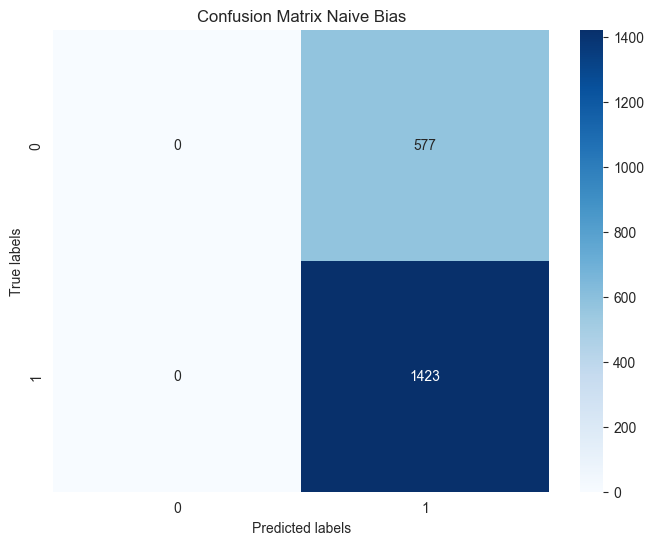

In [74]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Naive Bias')
plt.show()


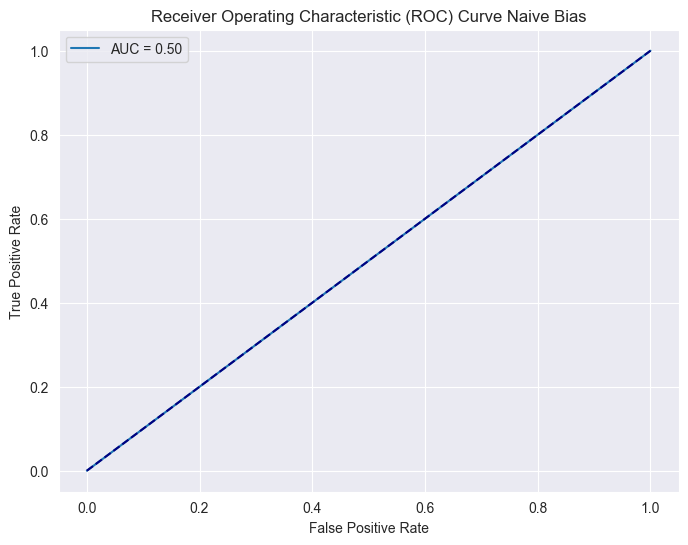

In [75]:
# Roc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities for each class
probs = Y_pred
probs = probs.flatten()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)

# Calculate the ROC AUC
roc_auc = roc_auc_score(Y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Naive Bias')
plt.legend()
plt.show()

In [76]:
data.head()

,age,severity_covid_death,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,fluoxetine,citalopram,...,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline,conditions_count,outcome
0,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,3,0,4,4,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1,0,2,0,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [77]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError
    
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        if output_error.ndim == 1:
            output_error = output_error.reshape(1, -1)

        input_error = np.dot(output_error, self.weights.T)

        #weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error
        weights_error = np.dot(self.input.reshape(-1, 1), output_error)
        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [78]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [80]:
# Create a Network instance
model = Network()

# Add layers to the network
model.add(FCLayer(input_size=22, output_size=64))  # Example: input layer with 2 neurons and 64 neurons in the hidden layer
model.add(ActivationLayer(activation=tanh, activation_prime=tanh_prime))  # Example: tanh activation function

# Add output layer
model.add(FCLayer(input_size=64, output_size=1))  # Example: output layer with 1 neuron for regression


# Set loss function
model.use(loss=mse, loss_prime=mse_prime)

In [81]:
model.fit(X_train, y_train, epochs=100, learning_rate=0.01)

epoch 1/100   error=0.252471
epoch 2/100   error=0.217530
epoch 3/100   error=0.210904
epoch 4/100   error=0.205813
epoch 5/100   error=0.201964
epoch 6/100   error=0.199195
epoch 7/100   error=0.197102
epoch 8/100   error=0.195465
epoch 9/100   error=0.194211
epoch 10/100   error=0.193198
epoch 11/100   error=0.192467
epoch 12/100   error=0.191855
epoch 13/100   error=0.191389
epoch 14/100   error=0.190970
epoch 15/100   error=0.190579
epoch 16/100   error=0.190186
epoch 17/100   error=0.189827
epoch 18/100   error=0.189538
epoch 19/100   error=0.189301
epoch 20/100   error=0.189087
epoch 21/100   error=0.188889
epoch 22/100   error=0.188718
epoch 23/100   error=0.188489
epoch 24/100   error=0.188302
epoch 25/100   error=0.188151
epoch 26/100   error=0.188091
epoch 27/100   error=0.187924
epoch 28/100   error=0.187841
epoch 29/100   error=0.187775
epoch 30/100   error=0.187722
epoch 31/100   error=0.187688
epoch 32/100   error=0.187671
epoch 33/100   error=0.187663
epoch 34/100   erro

In [82]:
# accuracy, precision, recall, f1 score

nn_prec = precision(y_test, test_predictions)
nn_rec = recall(y_test, test_predictions)
nn_f1 = f1_score(y_test, test_predictions)
nn_acc = accuracy(y_test, test_predictions)

print("Precision:", nn_prec)
print("Recall:", nn_rec)
print("F1 Score:", nn_f1)
print("Accuracy:", nn_acc)


Precision: 0.7399678972712681
Recall: 0.978076379066478
F1 Score: 0.8425220834602498
Accuracy: 0.7415


In [83]:
def predict(network, X):
    outputs = network.predict(X)
    # Apply threshold to convert outputs to binary labels
    predictions = [1 if output >= 0 else 0 for output in np.array(outputs).flatten()]
    return predictions

def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true.flatten() == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

# Predict on X_train
# predictions = predict(net, X_train)
predictions = predict(model, X_train)

# Calculate accuracy
accuracy = calculate_accuracy(y_train, predictions)
accuracy_percentage = accuracy * 100
accuracy_percentage


74.46249999999999

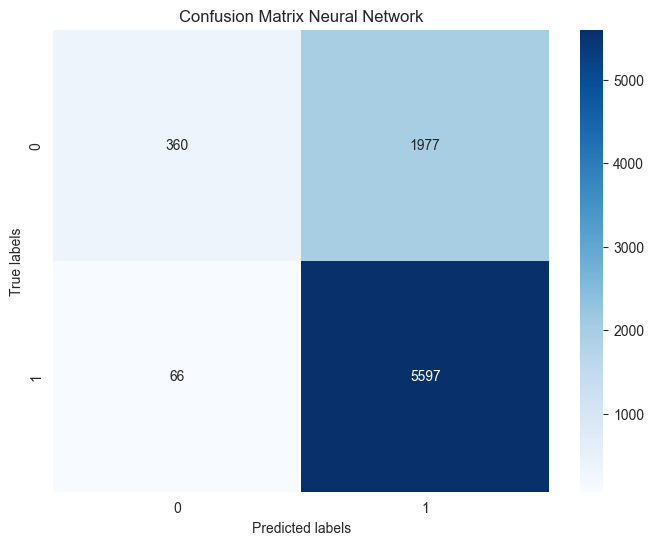

In [84]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_train, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Neural Network')
plt.show()


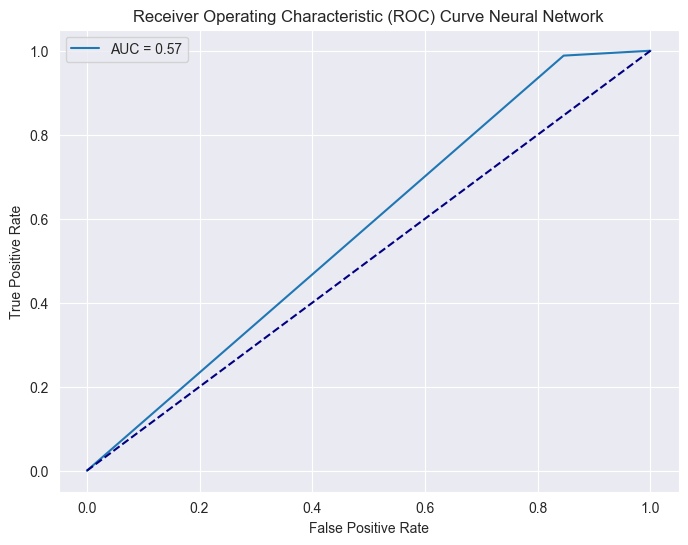

In [85]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities for each class
probs = np.array(predictions)
probs = probs.flatten()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, probs)

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_train, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Neural Network')
plt.legend()
plt.show()


In [86]:
import pandas as pd

# Define the data for different models
models_data = {
    "Model": ["Logistic Regression", "Naive Bias", "Neural Network"],
    "Accuracy": [lr_acc, nb_acc, nn_acc],
    "F1 Score": [lr_f1, nb_f1, nn_f1],
    "Precision": [lr_pre, nb_prec, nn_prec],
    "Recall": [lr_rec, nb_rec, nn_rec]
}

# Create a DataFrame
df = pd.DataFrame(models_data)

# Set the Model column as index
df.set_index("Model", inplace=True)

# Display the DataFrame
print(df)


                     Accuracy  F1 Score  Precision    Recall
Model                                                       
Logistic Regression    0.7415  0.842522   0.739968  0.978076
Naive Bias             0.7115  0.831434   0.711500  1.000000
Neural Network         0.7415  0.842522   0.739968  0.978076


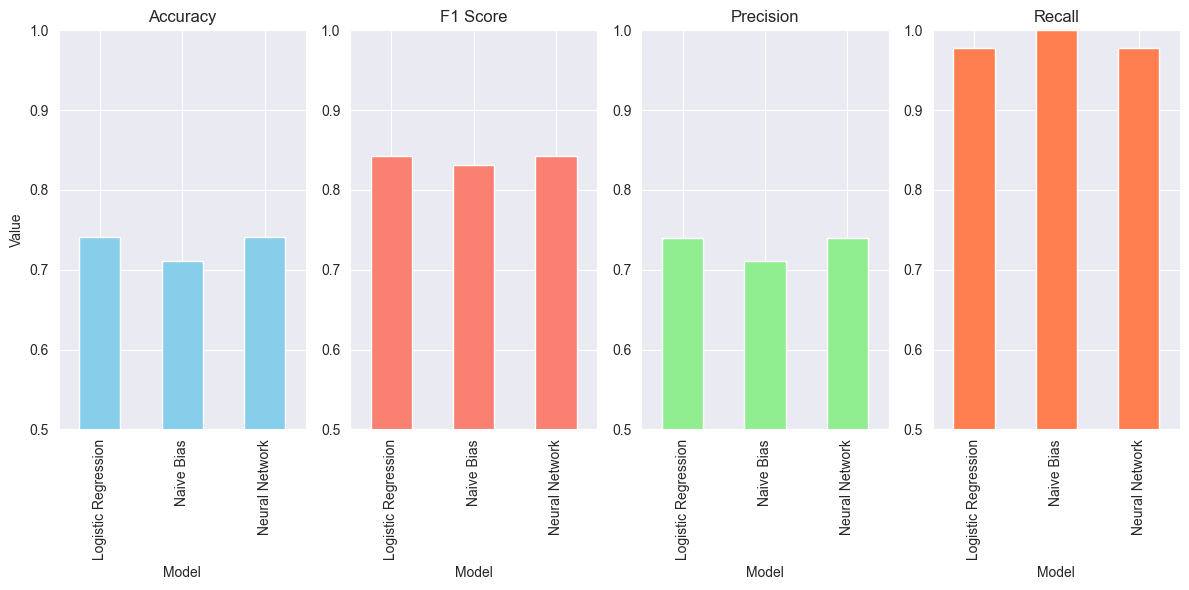

In [87]:
# Plotting the metrics for different models

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the accuracy
plt.subplot(1, 4, 1)
df["Accuracy"].plot(kind="bar", color="skyblue", ylim=(0.5, 1))
plt.title("Accuracy")
plt.ylabel("Value")

# Plot the F1 Score
plt.subplot(1, 4, 2)
df["F1 Score"].plot(kind="bar", color="salmon", ylim=(0.5, 1))
plt.title("F1 Score")

# Plot the Precision
plt.subplot(1, 4, 3)
df["Precision"].plot(kind="bar", color="lightgreen", ylim=(0.5, 1))
plt.title("Precision")

# Plot the Recall
plt.subplot(1, 4, 4)
df["Recall"].plot(kind="bar", color="coral", ylim=(0.5, 1))
plt.title("Recall")

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [88]:
import numpy as np

class XGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        for _ in range(self.n_estimators):
            tree = self._create_tree(X, y)
            self.trees.append(tree)

    def _create_tree(self, X, y):
        best_split = self._find_best_split(X, y)
        if best_split[0] is None:  # No valid split, make this a leaf node
            # For classification, return the most common class
            return np.bincount(y).argmax()
        left_indices, right_indices = self._split_dataset(X, y, *best_split)
        tree = {
            'split_feature': best_split[0],
            'split_value': best_split[1],
            'left': None,
            'right': None
        }
        if len(left_indices) > 0 and len(right_indices) > 0:
            tree['left'] = self._create_tree(X[left_indices], y[left_indices])
            tree['right'] = self._create_tree(X[right_indices], y[right_indices])
        return tree


    def _find_best_split(self, X, y):
        best_gain = -float('inf')
        best_feature = None
        best_value = None
        for feature in range(X.shape[1]):
            for value in np.unique(X[:, feature]):
                left_indices = np.where(X[:, feature] <= value)[0]
                right_indices = np.where(X[:, feature] > value)[0]
                if len(left_indices) < self.min_samples_split or len(right_indices) < self.min_samples_split:
                    continue
                gain = self._calculate_gain(y, y[left_indices], y[right_indices])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value
        if best_feature is None:  # No valid split found
            return None, None
        return best_feature, best_value


    def _calculate_gain(self, y, left_y, right_y):
        return (self._calculate_impurity(y) -
                (len(left_y) / len(y) * self._calculate_impurity(left_y) +
                 len(right_y) / len(y) * self._calculate_impurity(right_y)))

    def _calculate_impurity(self, y):
        p = np.sum(y == self.classes[0]) / len(y)
        return p * (1 - p)

    def _split_dataset(self, X, y, feature, value):
        left_indices = np.where(X[:, feature] <= value)[0]
        right_indices = np.where(X[:, feature] > value)[0]
        return left_indices, right_indices

    def predict(self, X):
        predictions = []
        for sample in X:
            prediction = 0
            for tree in self.trees:
                prediction += self._predict_tree(sample, tree)
            predictions.append(1 if prediction > 0 else 0)
        return np.array(predictions)

    def _predict_tree(self, sample, tree):
        if sample[tree['split_feature']] <= tree['split_value']:
            if isinstance(tree['left'], dict):
                return self._predict_tree(sample, tree['left'])
            else:
                return tree['left']
        else:
            if isinstance(tree['right'], dict):
                return self._predict_tree(sample, tree['right'])
            else:
                return tree['right']


In [89]:
import pandas as pd

# Load the dataset
file_path = 'Data/N3C_data_10000_sample_processed.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its shape
data.head()


,age,severity_covid_death,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,fluoxetine,citalopram,...,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline,conditions_count,outcome
0,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,3,0,4,4,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1,0,2,0,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [90]:
# Prepare the data for training
X = data.drop(columns=['outcome']).values
y = data['outcome'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 23)
y_train shape: (8000,)
X_test shape: (2000, 23)
y_test shape: (2000,)


In [91]:
# reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = y_train.ravel()
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (8000, 23)
y_train shape: (8000,)
X_test shape: (2000, 23)
y_test shape: (2000, 1)


In [92]:
# Train the XGBoost model
model = XGBoost(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2)
model.fit(X_train, y_train)


In [93]:
# Training and Testing Accuracy

# Predict on the training set
train_predictions = model.predict(X_train)

# Calculate the training accuracy
train_accuracy = np.mean(train_predictions == y_train)
train_accuracy_percentage = train_accuracy * 100

# Predict on the testing set
test_predictions = model.predict(X_test)

# Calculate the testing accuracy
test_accuracy = np.mean(test_predictions == y_test)
test_accuracy_percentage = test_accuracy * 100

# Display the training and testing accuracies
print("Training Accuracy:", train_accuracy_percentage)
print("Testing Accuracy:", test_accuracy_percentage)

Training Accuracy: 77.51249999999999
Testing Accuracy: 64.1085


In [94]:
# Propensity Score Matching
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Data/N3C_data_10000_sample_processed.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its shape
data.head()

,age,severity_covid_death,zip,ethnicity_concept_id,gender_concept_id,race_concept_id,trazodone,amitriptyline,fluoxetine,citalopram,...,sertraline,bupropion,mirtazapine,desvenlafaxine,doxepin,duloxetine,escitalopram,nortriptyline,conditions_count,outcome
0,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,3,0,4,4,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1,0,2,0,4,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [95]:
# Prepare the data for training
X = data.drop(columns=['outcome']).values
y = data['outcome'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 23)
y_train shape: (8000,)
X_test shape: (2000, 23)
y_test shape: (2000,)


In [96]:
# reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = y_train.ravel()
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 23)
y_train shape: (8000,)
X_test shape: (2000, 23)
y_test shape: (2000, 1)


In [97]:
# Propensity Score Matching
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_train_predictions = log_reg.predict(X_train)
log_reg_test_predictions = log_reg.predict(X_test)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_predictions)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_predictions)

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_predictions = rf.predict(X_train)
rf_test_predictions = rf.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)

# Train a gradient boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_train_predictions = gb.predict(X_train)
gb_test_predictions = gb.predict(X_test)
gb_train_accuracy = accuracy_score(y_train, gb_train_predictions)
gb_test_accuracy = accuracy_score(y_test, gb_test_predictions)

# Train an AdaBoost model
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_train_predictions = ab.predict(X_train)
ab_test_predictions = ab.predict(X_test)
ab_train_accuracy = accuracy_score(y_train, ab_train_predictions)
ab_test_accuracy = accuracy_score(y_test, ab_test_predictions)

# Train an Extra Trees model
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et_train_predictions = et.predict(X_train)
et_test_predictions = et.predict(X_test)
et_train_accuracy = accuracy_score(y_train, et_train_predictions)
et_test_accuracy = accuracy_score(y_test, et_test_predictions)

# Train a Bagging model
bc = BaggingClassifier()
bc.fit(X_train, y_train)
bc_train_predictions = bc.predict(X_train)
bc_test_predictions = bc.predict(X_test)
bc_train_accuracy = accuracy_score(y_train, bc_train_predictions)
bc_test_accuracy = accuracy_score(y_test, bc_test_predictions)

# Train a Voting model
vc = VotingClassifier(estimators=[('lr', log_reg), ('rf', rf), ('gb', gb), ('ab', ab), ('et', et), ('bc', bc)])
vc.fit(X_train, y_train)
vc_train_predictions = vc.predict(X_train)
vc_test_predictions = vc.predict(X_test)
vc_train_accuracy = accuracy_score(y_train, vc_train_predictions)
vc_test_accuracy = accuracy_score(y_test, vc_test_predictions)

# Display the training and testing accuracies
print("Logistic Regression:")
print("Training Accuracy:", log_reg_train_accuracy)

print("Random Forest:")
print("Training Accuracy:", rf_train_accuracy)

print("Gradient Boosting:")
print("Training Accuracy:", gb_train_accuracy)

print("AdaBoost:")
print("Training Accuracy:", ab_train_accuracy)

print("Extra Trees:")
print("Training Accuracy:", et_train_accuracy)

print("Bagging:")
print("Training Accuracy:", bc_train_accuracy)

print("Voting:")
print("Training Accuracy:", vc_train_accuracy)

# Display the training and testing accuracies
print("Logistic Regression:")
print("Training Accuracy:", log_reg_train_accuracy)
print("Testing Accuracy:", log_reg_test_accuracy)

print("Random Forest:")
print("Training Accuracy:", rf_train_accuracy)
print("Testing Accuracy:", rf_test_accuracy)

print("Gradient Boosting:")
print("Training Accuracy:", gb_train_accuracy)
print("Testing Accuracy:", gb_test_accuracy)

print("AdaBoost:")
print("Training Accuracy:", ab_train_accuracy)
print("Testing Accuracy:", ab_test_accuracy)

print("Extra Trees:")
print("Training Accuracy:", et_train_accuracy)
print("Testing Accuracy:", et_test_accuracy)

print("Bagging:")
print("Training Accuracy:", bc_train_accuracy)
print("Testing Accuracy:", bc_test_accuracy)

print("Voting:")
print("Training Accuracy:", vc_train_accuracy)
print("Testing Accuracy:", vc_test_accuracy)


c:\Users\devas\miniconda3\envs\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\devas\miniconda3\envs\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Logistic Regression:
Training Accuracy: 0.757625
Random Forest:
Training Accuracy: 0.7875
Gradient Boosting:
Training Accuracy: 0.770875
AdaBoost:
Training Accuracy: 0.76325
Extra Trees:
Training Accuracy: 0.7875
Bagging:
Training Accuracy: 0.785
Voting:
Training Accuracy: 0.78325
Logistic Regression:
Training Accuracy: 0.757625
Testing Accuracy: 0.747
Random Forest:
Training Accuracy: 0.7875
Testing Accuracy: 0.7465
Gradient Boosting:
Training Accuracy: 0.770875
Testing Accuracy: 0.752
AdaBoost:
Training Accuracy: 0.76325
Testing Accuracy: 0.7515
Extra Trees:
Training Accuracy: 0.7875
Testing Accuracy: 0.74
Bagging:
Training Accuracy: 0.785
Testing Accuracy: 0.7495
Voting:
Training Accuracy: 0.78325
Testing Accuracy: 0.7505


In [98]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the data
# data_path = 'Data/N3C_data_10000_sample_processed.csv'
# data = pd.read_csv(data_path)

# # Check the first few rows to understand the structure
# print(data.head())

# # Assuming the target variable is named 'outcome', update this if it differs
# target = 'outcome'

# # Split data into features and labels
# X = data.drop(columns=[target])
# y = data[target]

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Training data shape:", X_train.shape)
# print("Testing data shape:", X_test.shape)


   age  severity_covid_death  zip  ethnicity_concept_id  gender_concept_id  \
0    2                     0    0                     0                  0   
1    3                     0    4                     4                  4   
2    1                     0    2                     0                  4   
3    2                     0    0                     0                  0   
4    2                     0    0                     0                  0   

   race_concept_id  trazodone  amitriptyline  fluoxetine  citalopram  ...  \
0                0        0.0            0.0         0.0         0.0  ...   
1                0        0.0            0.0         0.0         0.0  ...   
2                0        0.0            0.0         0.0         0.0  ...   
3                0        0.0            0.0         0.0         0.0  ...   
4                0        0.0            0.0         0.0         0.0  ...   

   sertraline  bupropion  mirtazapine  desvenlafaxine  doxepin  dulo

In [99]:
# class DecisionTree:
#     def __init__(self, max_depth=5, min_size=10):
#         self.max_depth = max_depth
#         self.min_size = min_size
#         self.root = None

#     def fit(self, X, y):
#         dataset = np.column_stack((X, y))
#         self.root = self.build_tree(dataset, self.max_depth, self.min_size)

#     def predict(self, X):
#         predictions = [self.predict_row(self.root, row) for row in X]
#         return np.array(predictions)

#     def predict_row(self, node, row):
#         if row[node['index']] < node['value']:
#             if isinstance(node['left'], dict):
#                 return self.predict_row(node['left'], row)
#             else:
#                 return node['left']
#         else:
#             if isinstance(node['right'], dict):
#                 return self.predict_row(node['right'], row)
#             else:
#                 return node['right']

#     def gini_index(self, groups, classes):
#         n_instances = float(sum([len(group) for group in groups]))
#         gini = 0.0
#         for group in groups:
#             size = float(len(group))
#             if size == 0:
#                 continue
#             score = 0.0
#             for class_val in classes:
#                 p = [row[-1] for row in group].count(class_val) / size
#                 score += p * p
#             gini += (1.0 - score) * (size / n_instances)
#         return gini

#     def test_split(self, index, value, dataset):
#         left, right = list(), list()
#         for row in dataset:
#             if row[index] < value:
#                 left.append(row)
#             else:
#                 right.append(row)
#         return left, right

#     def get_split(self, dataset):
#         class_values = list(set(row[-1] for row in dataset))
#         b_index, b_value, b_score, b_groups = 999, 999, 999, None
#         for index in range(len(dataset[0])-1):
#             for row in dataset:
#                 groups = self.test_split(index, row[index], dataset)
#                 gini = self.gini_index(groups, class_values)
#                 if gini < b_score:
#                     b_index, b_value, b_score, b_groups = index, row[index], gini, groups
#         return {'index':b_index, 'value':b_value, 'groups':b_groups}

#     def to_terminal(self, group):
#         outcomes = [row[-1] for row in group]
#         return max(set(outcomes), key=outcomes.count)

#     def split(self, node, max_depth, min_size, depth):
#         left, right = node['groups']
#         del(node['groups'])
#         if not left or not right:
#             node['left'] = node['right'] = self.to_terminal(left + right)
#             return
#         if depth >= max_depth:
#             node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
#             return
#         if len(left) <= min_size:
#             node['left'] = self.to_terminal(left)
#         else:
#             node['left'] = self.get_split(left)
#             self.split(node['left'], max_depth, min_size, depth+1)
#         if len(right) <= min_size:
#             node['right'] = self.to_terminal(right)
#         else:
#             node['right'] = self.get_split(right)
#             self.split(node['right'], max_depth, min_size, depth+1)

#     def build_tree(self, train, max_depth, min_size):
#         root = self.get_split(train)
#         self.split(root, max_depth, min_size, 0)
#         return root


In [ ]:
# # Train a Decision Tree model

# dt = DecisionTree()
# dt.fit(X_train, y_train)
# dt_train_predictions = dt.predict(X_train)

In [ ]:
# dt = DecisionTree()
# dt_train_predictions = dt.predict(X_train)

In [101]:
# Prepare the data for training
X = data.drop(columns=['outcome']).values
y = data['outcome'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 23)
y_train shape: (8000,)
X_test shape: (2000, 23)
y_test shape: (2000,)


In [102]:
# reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = y_train.ravel()
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 23)
y_train shape: (8000,)
X_test shape: (2000, 23)
y_test shape: (2000, 1)


In [103]:
import numpy as np

class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_index]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column >= self.threshold] = -1
        return predictions

def find_best_stump(X, y, weights):
    n_samples, n_features = X.shape
    best_stump = DecisionStump()
    min_error = float('inf')
    for feature_index in range(n_features):
        feature_values = X[:, feature_index]
        thresholds = np.unique(feature_values)
        for threshold in thresholds:
            p = 1
            predictions = np.ones(n_samples)
            predictions[feature_values < threshold] = -1
            misclassified = weights * (predictions != y)
            error = sum(misclassified)
            if error > 0.5:
                error = 1 - error
                p = -1
            if error < min_error:
                min_error = error
                best_stump.polarity = p
                best_stump.threshold = threshold
                best_stump.feature_index = feature_index
    return best_stump, min_error

class GradientBoosting:
    def __init__(self, n_estimators=5, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.stumps = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        weights = np.full(n_samples, (1 / n_samples))
        y_coded = np.where(y == 0, -1, 1)
        
        for _ in range(self.n_estimators):
            stump, error = find_best_stump(X, y_coded, weights)
            alpha = self.learning_rate * (0.5 * np.log((1.0 - error) / (error + 1e-10)))
            predictions = stump.predict(X)
            weights *= np.exp(-alpha * y_coded * predictions)
            weights /= np.sum(weights)
            
            stump.alpha = alpha
            self.stumps.append(stump)

    def predict(self, X):
        stump_predictions = np.array([stump.alpha * stump.predict(X) for stump in self.stumps])
        return np.sign(np.sum(stump_predictions, axis=0))


In [105]:
# Convert to numpy arrays
# X = X.values
# y = y.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Example usage:
# X_train, y_train would be your training dataset
gb = GradientBoosting(n_estimators=10, learning_rate=0.5)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)


In [107]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.66
